In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic=pd.read_csv("/kaggle/input/datasets/fatuzahra/titanic/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
cabin_dropped= titanic.drop(columns="Cabin")
cabin_dropped.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [5]:
cabin_dropped["Age"].fillna(
    cabin_dropped["Age"].mean(),inplace=True
)
cabin_dropped.isnull().sum()

/tmp/ipykernel_17/3133985530.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cabin_dropped["Age"].fillna(


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [6]:
cabin_dropped["Embarked"].fillna(
    cabin_dropped["Embarked"].mode()[0], inplace=True
)
cabin_dropped.isnull().sum()

/tmp/ipykernel_17/3271196257.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cabin_dropped["Embarked"].fillna(


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [7]:
# now we have to deal with the outliers(extreme, impossible values)

# for this we use visualization to see if there actuall are any outliers

# we must import matplotlib.pyplot and seaborn for visualization


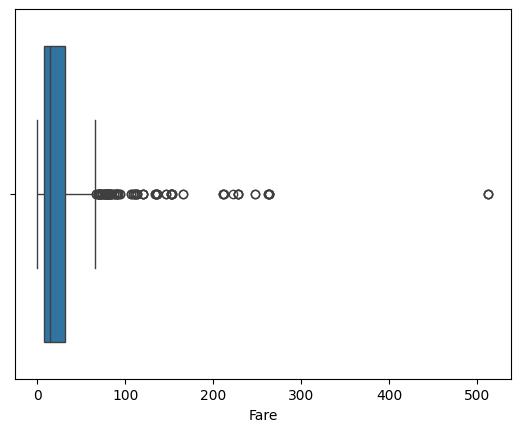

In [8]:
# data visualization

# boxplot helps us see if there are any outliers:

plt.figure()
sns.boxplot(x=cabin_dropped["Fare"])
plt.show()

#all the dots/points are the outliers

In [9]:
#it is important to remove the outliers, we can use the IQR method to remove the outliers

# in the IQR method, we specify the IQR value, lower bound(minimum) and upper bound(maximum) values
# the IQR is Q3-Q1
# Q1 is the 25th percentile
# Q3 is the 75th percentile
# lower bound is Q1-1.5*IQR
# upper bound is Q3+1.5*IQR